In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

## Basis-Echt-Datensatz der echten-Reviews erstellen

3 Kategorien: Hotels, Restaurants & Aktivitäten

In [ ]:
df_rest = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Restaurants_2023-03-26_09-43-08-320.csv')
df_act = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Activities_2023-03-26_11-08-15-435.csv')
df_hotel = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Hotels_2023-03-26_11-34-16-492.csv')

print('Restaurants (Shape): ', df_rest.shape)
print('Activities (Shape): ', df_act.shape)
print('Hotels (Shape): ', df_hotel.shape)

In [14]:
columns_to_keep = [
    "stars",
    "publishedAtDate",
    "name",
    "text",
    "title",
    "subTitle",
    "description",
    "price",
    "totalScore",
    "likesCount",
    "isLocalGuide",
    "reviewId",
    "categoryName",
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9",
    "reviewUrl",
    "reviewerId",
    "reviewerNumberOfReviews",
    "reviewerPhotoUrl",
    "reviewerUrl",
    "reviewsCount",
    "scrapedAt",
    "state",
    "street",
    "temporarilyClosed",
    "url",
    "website",
    "placeId",
    "updatesFromCustomers/language",
    
    "categories/0",
    "categories/1",
    "categories/2",
    "categoryName"
]

In [ ]:
df_rest = df_rest.dropna(subset=["reviewImageUrls/0"])
df_rest = df_rest[columns_to_keep]
print(df_rest['placeId'].nunique())
df_rest['genre'] = 'restaurant'
print(df_rest.shape)

df_act = df_act.dropna(subset=["reviewImageUrls/0"])
df_act = df_act[columns_to_keep]
print(df_act['placeId'].nunique())
df_act['genre'] = 'activity'
print(df_act.shape)

df_hotel = df_hotel.dropna(subset=["reviewImageUrls/0"])
print(df_hotel['placeId'].nunique())
df_hotel = df_hotel[columns_to_keep]
df_hotel['genre'] = 'hotel'
print(df_hotel.shape)

In [ ]:
df = pd.concat([df_rest, df_act, df_hotel], ignore_index=True)
print(df.shape)
df.to_csv('all_rest_act_hotel.csv', index=False)

Bilder URLs auf 256-256 Pixel anpassen. Über String-Manipulation auf 256-256 Auflösung kommen. 256-256 wird später auch für Dalle-2 verwendet.

In [ ]:
image_urls_cols = [
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9"
]

for col in image_urls_cols:
    df[col] = df[col].str.replace("=w150-h150-k-no-p", "=w256-h256-p-k-no")

print(df.shape)

### Keywörter extrahiert

Nur für GPT3 Finetune V1 verwendet und für GPT3.5 (ohne Finetuning) verwendet. Keine Verwendung im finale IT-Artefakt. **Deshalb auskommentiert.**

In [ ]:
# df = pd.read_csv('all_rest_act_hotel.csv').head(20)
# df['text'] = df['text'].astype(str)
# # print("Convertion done.")

# df['keywords'] = df['text'].apply(lambda x: kw_model.extract_keywords(x,keyphrase_ngram_range=(1,2) ,
#                                      stop_words='english', 
#                                      highlight=False,
#                                      top_n=5))
# print("Keywords extraction done.")
# df.to_csv('base_keywords_sentiment_v2.csv', index=False)

### Sentiment Analyse

Nur für GPT3 Finetune V1 verwendet und für GPT3.5 (ohne Finetuning) verwendet. Keine Verwendung im finale IT-Artefakt.  Dort wird zwar auch mit einer  Sentiment-Analyse auf Basis von  *twitter-xlm-roberta-base-sentiment* gearbeitet, allerdings nicht auf den Orginaltexte angewendet (wie hier), sondern auf die GPT3 Samples. **Deshalb auskommentiert**

In [ ]:
# model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
# df = pd.read_csv('base_keywords_sentiment.csv')
# df['sentiment'] = np.nan
# df['sentiment'] = df['sentiment'].astype(str)
# df['text'] = df['text'].astype(str)
# df['sent_score_0'] = np.nan

# for idx, row in df.iterrows():
#     try: 
#         print("Processing row: ", idx)
#         sentiment = sentiment_task(row['text'])
#         df.at[idx, 'sentiment'] = sentiment
#     except RuntimeError:
#         print("Skipped due to messy data. Row: ", idx)
#         pass
# df.to_csv('base_keywords_sentiment.csv', index=False)

In [ ]:
# df['keywords_only'] = df['keywords'].apply(lambda x: [i[0] for i in x])
# print(df['keywords_only'])
# df.to_csv('base_keywords_sentiment.csv', index=False)

In [ ]:
# df_neu = pd.read_csv('base_keywords_sentiment.csv')
# df_neu['sentiment'] = df_neu['sentiment'].astype(str)
# df['label'] = 'real'
# print(df.shape)
# df.to_csv('base_keywords_sentiment.csv', index=False)
# df_neu.to_csv('base_keywords_sentiment.csv', index=False)

### Datensatz reduzieren (aus Kostengründen)

In [ ]:
df = pd.read_csv('base_keywords_sentiment.csv')
print(df.shape)
df = df[df['keywords_only'] != "['nan']"]
print(df.shape)
df.to_csv('base_keywords_sentiment.csv', index=False)

Finaler Base-Datensatz der echten Reviews: **real_base_sent_reduced.csv**

In [ ]:
df = pd.read_csv('base_keywords_sentiment.csv')
print(df['stars'].mean())
print(df.shape)
df = df.sort_values(by=['stars'], ascending=True)
df = df.groupby('placeId').apply(lambda x: x.sample(n=14,random_state = 2) if len(x) > 14 else x)
print(df.shape)
print(df['placeId'].nunique())

print(df['stars'].value_counts().sort_index())
print(df['stars'].mean())
print(df['genre'].value_counts())

df.to_csv('real_base_sent_reduced.csv', index=False)

## Visualisierung des Basis-Echt-Datensatzes

Für besseres Verständnis der Daten des zugrunde liegenden echten Datensatzes: **real_base_sent_reduced.csv**

In [5]:
image_urls_cols = [
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9"
]

In [6]:
df = pd.read_csv('real_base_sent_reduced.csv')
df['text'] = df['text'].astype(str)

word_count_avg = df['text'].str.split().apply(len).mean()
print("Average Review Length (Words): ", word_count_avg.round(1))

word_count_tot = df['text'].str.split().apply(len).sum()
print("Total Word Count: " ,  word_count_tot)

Average Review Length (Words):  56.2
Total Word Count:  39625


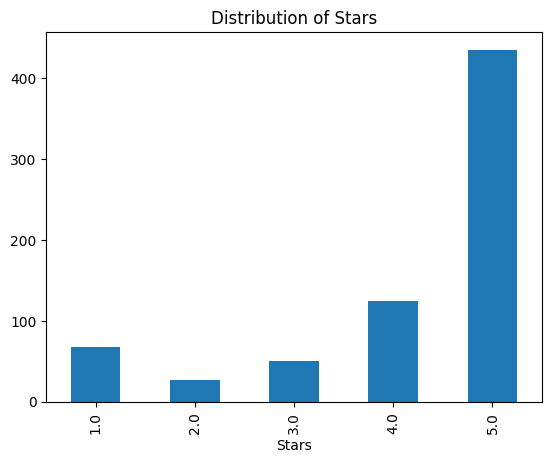

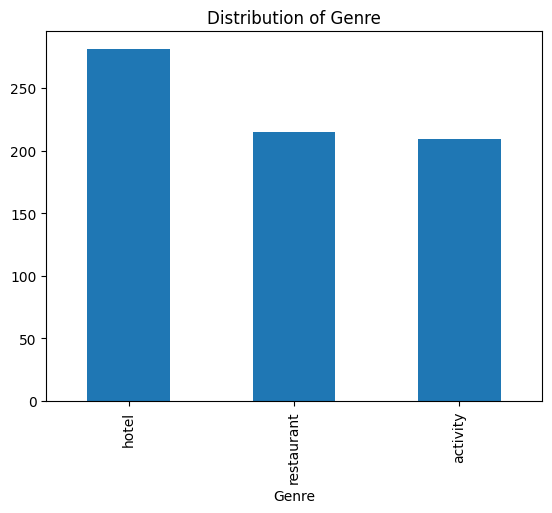

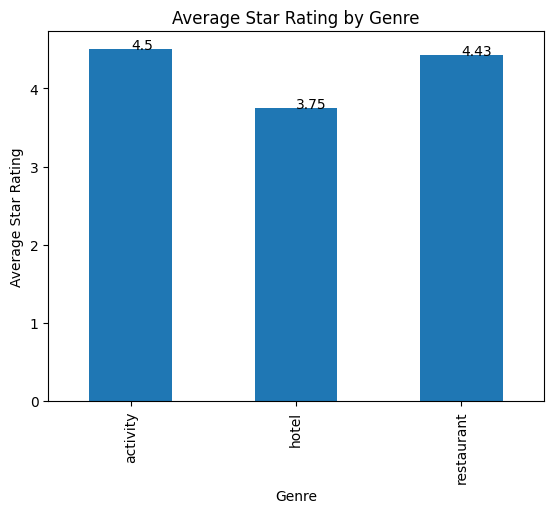

In [7]:
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
#plt.savefig('02_Images/graphics/stars_distribution.svg', dpi=300, bbox_inches='tight')
plt.show()

df['genre'].value_counts().plot(kind='bar') 
plt.title('Distribution of Genre')
plt.xlabel('Genre')
#plt.savefig('02_Images/graphics/count_reviews_by_genre.svg')
plt.show()

df.groupby('genre')['stars'].mean().plot(kind='bar')
for i, v in enumerate(df.groupby('genre')['stars'].mean().round(2)):
    plt.text(i, v, str(v), color='black')

plt.title('Average Star Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Star Rating')
#plt.savefig('02_Images/graphics/average_star_rating_by_genre.png')
plt.show()